# sensitivity analysis based upon salinity cutoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import scipy.interpolate as interp
import pandas as pd

In [24]:
og_cu = np.array([8.06,1.56,6.63])
in_cu = np.array([2.91,0.19,0.54])
de_cu = np.array([10.32,4.79,14.36])

og_fr = np.array([0.91,10.08,7.25])
in_fr = np.array([1.39,14.27,9.17])
de_fr = np.array([0.73,8.72,6.74])

tot = np.array([19.56,39.40,41.12])

og_sh = tot-og_fr-og_cu
in_sh = tot-in_fr-in_cu
de_sh = tot-de_fr-de_cu


<ipython-input-3-2d6699bb4cea>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,0].set_xticklabels(ticks, rotation=30)
<ipython-input-3-2d6699bb4cea>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1,1].set_xticklabels(ticks, rotation=30)


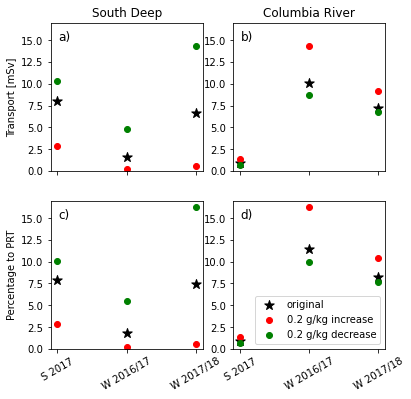

In [3]:
# cuc sensitivity first
# in the format, summer, winter 2016/17, winter 2017/18
og_sv = np.array([8.06,1.56,6.63])
in_sv = np.array([2.91,0.19,0.54])
de_sv = np.array([10.32,4.79,14.36])

og_per = np.array([7.91,1.76,7.48])
in_per = np.array([2.85,0.22,0.61])
de_per = np.array([10.11,5.43,16.21])

fig, ax = plt.subplots(2,2,figsize=(6,6))

ticks = np.array(['S 2017','W 2016/17','W 2017/18'])

letter = ['a)', 'b)','c)','d)']
ii=[0,0,1,1]
jj=[0,1,0,1]
for k in range(4):
    ax[ii[k],jj[k]].set_ylim([0,17])
    plt.text(.05, .95, letter[k], ha='left', va='top', transform=ax[ii[k],jj[k]].transAxes, fontsize=12)



ax[0,0].scatter(ticks,og_sv, color='k', marker='*', s=100)
ax[0,0].scatter(ticks,in_sv, color='r')
ax[0,0].scatter(ticks,de_sv, color='g')
ax[0,0].set_ylabel('Transport [mSv]')
ax[0,0].set_title('South Deep', fontsize=12)
ax[0,0].set_xticklabels([], rotation=45)



ax[1,0].scatter(ticks,og_per, color='k', marker='*', s=100)
ax[1,0].scatter(ticks,in_per, color='r')
ax[1,0].scatter(ticks,de_per, color='g')
ax[1,0].set_ylabel('Percentage to PRT')
ax[1,0].set_xticklabels(ticks, rotation=30)


# fresh sensitivity 
# in the format, summer, winter 2016/17, winter 2017/18
og_sv = np.array([0.91,10.08,7.25])
in_sv = np.array([1.39,14.27,9.17])
de_sv = np.array([0.73,8.72,6.74])

og_per = np.array([0.89,11.44,8.18])
in_per = np.array([1.36,16.22,10.36])
de_per = np.array([0.72,9.90,7.61])

ax[0,1].scatter(ticks,og_sv, color='k', marker='*', s=100)
ax[0,1].scatter(ticks,in_sv, color='r')
ax[0,1].scatter(ticks,de_sv, color='g')
ax[0,1].set_title('Columbia River', fontsize=12)
ax[0,1].set_xticklabels([], rotation=45)


ax[1,1].scatter(ticks,og_per, color='k', marker='*', s=100, label='original')
ax[1,1].scatter(ticks,in_per, color='r', label='0.2 g/kg increase')
ax[1,1].scatter(ticks,de_per, color='g', label='0.2 g/kg decrease')
ax[1,1].set_xticklabels(ticks, rotation=30)


ax[1,1].legend()

# plt.tight_layout()


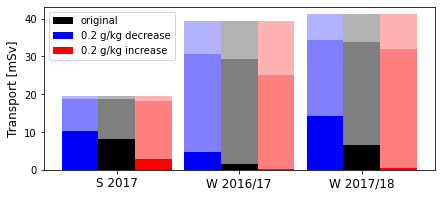

In [4]:
fig, ax = plt.subplots(1,1,figsize=(7,3))

tick_spots = np.array([1,2,3])
ticks = np.array(['S 2017','W 2016/17','W 2017/18'])
ax.bar(tick_spots,og_cu,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax.bar(tick_spots,og_sh,width=0.3,color='k',alpha=0.5,bottom=og_cu,zorder=2)
ax.bar(tick_spots,og_fr,width=0.3,color='k',alpha=0.3,bottom=og_sh+og_cu,zorder=2)

ax.bar(tick_spots-0.3,de_cu,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax.bar(tick_spots-0.3,de_sh,width=0.3,color='b',alpha=0.5,bottom=de_cu,zorder=2)
ax.bar(tick_spots-0.3,de_fr,width=0.3,color='b',alpha=0.3,bottom=de_sh+de_cu,zorder=2)

ax.bar(tick_spots+0.3,in_cu,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax.bar(tick_spots+0.3,in_sh,width=0.3,color='r',alpha=0.5,bottom=in_cu,zorder=2)
ax.bar(tick_spots+0.3,in_fr,width=0.3,color='r',alpha=0.3,bottom=in_sh+in_cu,zorder=2)

ax.set_xticks(tick_spots)
ax.set_xticklabels(ticks, fontsize=12)
ax.set_ylabel('Transport [mSv]',fontsize=12)
ax.legend()



# and for salishseacast

In [2]:
def get_data(mydata, starttime, endtime, time):
    salt = mydata.init_salt[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    init_depth = depthf(mydata.init_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    depth = depthf(mydata.final_z[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]-1.)[0]
    section = mydata.final_section[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    trans = mydata.final_transp[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]/(time)
    lons = mydata.final_lon[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    init_time = mydata.init_t[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    final_time = mydata.final_t[(mydata.init_t >= starttime) & (mydata.init_t <= endtime)]
    
    return salt, depth, init_depth, section, trans, lons, init_time, final_time

In [3]:
Meander = 0
Admiralty = 2
Deception = 3
Rosario = 4
Sanjuan = 5
Haro = 6

tide = 24

In [4]:
mymesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
depthf = interp.interp1d(mymesh.z, mymesh.gdept_1d)

In [5]:
# summer 2017
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
sum_start = 1+(5*720+(sum(yearjumps[:5+1]*24)))
sum_end = 720+(8*720+(sum(yearjumps[:8+1]*24)))

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt, depth, init_depth, section, trans, lons, init_time, final_time = get_data(mydata, sum_start, sum_end, sum_end-sum_start+1)

dic = {'salt': salt, 'depth':depth, 'init_depth':init_depth, 'section':section, 'transport':trans, 'lon':lons, 'init_time':init_time, 'final_time':final_time}
dfS = pd.DataFrame(data=dic)


In [26]:
total_tr = np.sum([np.sum(dfS.transport[dfS.section==Haro]),np.sum(dfS.transport[dfS.section==Sanjuan]),np.sum(dfS.transport[dfS.section==Rosario]),
           np.sum(dfS.transport[dfS.section==Admiralty]),np.sum(dfS.transport[dfS.section==Deception]),
           np.sum(dfS.transport[(dfS.section == Meander) & (abs(dfS.final_time-dfS.init_time) > 24)])])

In [27]:
# original
d = 150

inter = dfS[(dfS.init_depth <= d) & (dfS.salt >= 32)]
deep = dfS[(dfS.init_depth > d)]
surf = dfS[(dfS.init_depth <= d) & (dfS.salt < 32)]

og_su = [np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])] 
og_in = [np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])] 
og_de = [np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])]

In [28]:
#shallow
d = 150-25

inter = dfS[(dfS.init_depth <= d) & (dfS.salt >= 32)]
deep = dfS[(dfS.init_depth > d)]
surf = dfS[(dfS.init_depth <= d) & (dfS.salt < 32)]

de_su = [np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])] 
de_in = [np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])] 
de_de = [np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])]

In [29]:
d = 150+25

inter = dfS[(dfS.init_depth <= d) & (dfS.salt >= 32)]
deep = dfS[(dfS.init_depth > d)]
surf = dfS[(dfS.init_depth <= d) & (dfS.salt < 32)]


in_su = [np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])] 
in_in = [np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])] 
in_de = [np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])]

In [30]:
# winter 2016/17
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
win_start1 = 1+(9*720+(sum(yearjumps[:9+1]*24)))
win_end1 = 720+(11*720+(sum(yearjumps[:11+1]*24)))

win_start2 = 1+(0*720+(sum(yearjumps[:0+1]*24)))
win_end2 = 720+(5*720+(sum(yearjumps[:5+1]*24)))

time = (win_end1-win_start1+1) + (win_end2-win_start2+1)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan16/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltW, depthW, init_depthW, sectionW, transW, lonsW, init_tW, final_tW = get_data(mydata, win_start1, win_end1, time)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
saltS, depthS, init_depthS, sectionS, transS, lonsS, init_tS, final_tS = get_data(mydata, win_start2, win_end2, time)

salt = np.append(saltW, saltS)
depth = np.append(depthW, depthS)
init_depth = np.append(init_depthW, init_depthS)
section = np.append(sectionW, sectionS)
trans = np.append(transW, transS)
lons = np.append(lonsW, lonsS)
iniT = np.append(init_tW, init_tS)
finT = np.append(final_tW, final_tS)

dic = {'salt': salt, 'depth':depth, 'init_depth':init_depth, 'section':section, 'transport':trans, 'lon':lons, 'init_time':iniT, 'final_time':finT}
df = pd.DataFrame(data=dic)

In [31]:
total_tr = np.sum([np.sum(df.transport[df.section==Haro]),np.sum(df.transport[df.section==Sanjuan]),np.sum(df.transport[df.section==Rosario]),
           np.sum(df.transport[df.section==Admiralty]),np.sum(df.transport[df.section==Deception]),
           np.sum(df.transport[(df.section == Meander) & (abs(df.final_time-df.init_time) > 24)])])

In [32]:
# original
d = 150

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

og_su = np.append(og_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
og_in = np.append(og_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
og_de = np.append(og_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

In [33]:
# shallow
d = 150-125

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

de_su = np.append(de_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
de_in = np.append(de_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
de_de = np.append(de_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

In [34]:
# deepen
d = 150+125

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

in_su = np.append(in_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
in_in = np.append(in_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
in_de = np.append(in_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

In [35]:
# winter 2017/18
yearjumps = [0,1,-2,1,0,1,0,1,1,0,1,0]
str_mo = ['jan', 'feb', 'mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec']
win_start = 1+(9*720+(sum(yearjumps[:9+1]*24)))
win_end = 720+(11*720+(sum(yearjumps[:11+1]*24)))

time = win_end-win_start+1+720*3

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/1yr_runs/201905_1hr/forward_01jan17/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt17, depth17, init_depth17, section17, trans17, lons17, initT17, finalT17 = get_data(mydata, win_start, win_end, time)

start = 1
end = 720

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01jan18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_jan, depth_jan, init_depth_jan, section_jan, trans_jan, lons_jan, initTjan, finalTjan = get_data(mydata, start, end, time)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01feb18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_feb, depth_feb, init_depth_feb, section_feb, trans_feb, lons_feb, initTfeb, finalTfeb = get_data(mydata, start, end, time)

file = '/ocean/rbeutel/MOAD/analysis-becca/Ariane/201905_1hr/forward_01mar18/ariane_positions_quantitative.nc'
mydata = xr.open_dataset(file)
salt_mar, depth_mar, init_depth_mar, section_mar, trans_mar, lons_mar, initTmar, finalTmar = get_data(mydata, start, end, time)

salt = np.append(np.append(np.append(salt17, salt_jan), salt_feb), salt_mar)
depth = np.append(np.append(np.append(depth17, depth_jan), depth_feb), depth_mar)
init_depth = np.append(np.append(np.append(init_depth17, init_depth_jan), init_depth_feb), init_depth_mar)
section = np.append(np.append(np.append(section17, section_jan), section_feb), section_mar)
trans = np.append(np.append(np.append(trans17, trans_jan), trans_feb), trans_mar)
lons = np.append(np.append(np.append(lons17, lons_jan), lons_feb), lons_mar)
initT = np.append(np.append(np.append(initT17, initTjan), initTfeb), initTmar)
finalT = np.append(np.append(np.append(finalT17, finalTjan), finalTfeb), finalTmar)

dic = {'salt': salt, 'depth':depth, 'init_depth':init_depth, 'section':section, 'transport':trans, 'lon':lons, 'init_time':initT, 'final_time':finalT}
df = pd.DataFrame(data=dic)

In [36]:
total_tr = np.sum([np.sum(df.transport[df.section==Haro]),np.sum(df.transport[df.section==Sanjuan]),np.sum(df.transport[df.section==Rosario]),
           np.sum(df.transport[df.section==Admiralty]),np.sum(df.transport[df.section==Deception]),
           np.sum(df.transport[(df.section == Meander) & (abs(df.final_time-df.init_time) > 24)])])

In [37]:
# original
d = 150

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

og_su = np.append(og_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
og_in = np.append(og_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
og_de = np.append(og_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

In [38]:
# shallow
d = 150-125

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

de_su = np.append(de_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
de_in = np.append(de_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
de_de = np.append(de_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

In [39]:
# deepen
d = 150+125

inter = df[(df.init_depth <= d) & (df.salt >= 32)]
deep = df[(df.init_depth > d)]
surf = df[(df.init_depth <= d) & (df.salt < 32)]

in_su = np.append(in_su,[np.sum(surf.transport[(surf.final_time-surf.init_time > tide)& (np.isnan(surf.section)==False)])]) 
in_in = np.append(in_in,[np.sum(inter.transport[(inter.final_time-inter.init_time > tide)& (np.isnan(inter.section)==False)])]) 
in_de = np.append(in_de,[np.sum(deep.transport[(deep.final_time-deep.init_time > tide)& (np.isnan(deep.section)==False)])])

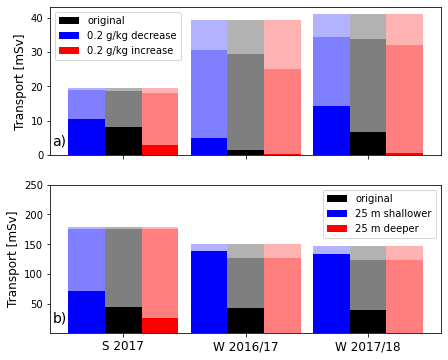

In [64]:
fig, ax = plt.subplots(2,1,figsize=(7,6))

tick_spots = np.array([1,2,3])
ticks = np.array(['S 2017','W 2016/17','W 2017/18'])

# CIOPS division
ax[0].bar(tick_spots,og_cu,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax[0].bar(tick_spots,og_sh,width=0.3,color='k',alpha=0.5,bottom=og_cu,zorder=2)
ax[0].bar(tick_spots,og_fr,width=0.3,color='k',alpha=0.3,bottom=og_sh+og_cu,zorder=2)

ax[0].bar(tick_spots-0.3,de_cu,width=0.3,color='b',alpha=1,zorder=2,label='0.2 g/kg decrease')
ax[0].bar(tick_spots-0.3,de_sh,width=0.3,color='b',alpha=0.5,bottom=de_cu,zorder=2)
ax[0].bar(tick_spots-0.3,de_fr,width=0.3,color='b',alpha=0.3,bottom=de_sh+de_cu,zorder=2)

ax[0].bar(tick_spots+0.3,in_cu,width=0.3,color='r',alpha=1,zorder=2,label='0.2 g/kg increase')
ax[0].bar(tick_spots+0.3,in_sh,width=0.3,color='r',alpha=0.5,bottom=in_cu,zorder=2)
ax[0].bar(tick_spots+0.3,in_fr,width=0.3,color='r',alpha=0.3,bottom=in_sh+in_cu,zorder=2)

# salishseacast division
ax[1].bar(tick_spots,og_de/1000,width=0.3,color='k',alpha=1,zorder=2,label='original')
ax[1].bar(tick_spots,og_in/1000,width=0.3,color='k',alpha=0.5,bottom=og_de/1000,zorder=2)
ax[1].bar(tick_spots,og_su/1000,width=0.3,color='k',alpha=0.3,bottom=og_de/1000+og_in/1000,zorder=2)

ax[1].bar(tick_spots-0.3,de_de/1000,width=0.3,color='b',alpha=1,zorder=2,label='25 m shallower')
ax[1].bar(tick_spots-0.3,de_in/1000,width=0.3,color='b',alpha=0.5,bottom=de_de/1000,zorder=2)
ax[1].bar(tick_spots-0.3,de_su/1000,width=0.3,color='b',alpha=0.3,bottom=de_de/1000+de_in/1000,zorder=2)

ax[1].bar(tick_spots+0.3,in_de/1000,width=0.3,color='r',alpha=1,zorder=2,label='25 m deeper')
ax[1].bar(tick_spots+0.3,in_in/1000,width=0.3,color='r',alpha=0.5,bottom=in_de/1000,zorder=2)
ax[1].bar(tick_spots+0.3,in_su/1000,width=0.3,color='r',alpha=0.3,bottom=in_de/1000+in_in/1000,zorder=2)
ax[1].set_ylim([1,250])

ax[0].set_xticks(tick_spots)
ax[0].set_xticklabels([])
ax[1].set_xticks(tick_spots)
ax[1].set_xticklabels(ticks, fontsize=12)

ax[0].set_ylabel('Transport [mSv]',fontsize=12)
ax[1].set_ylabel('Transport [mSv]',fontsize=12)
ax[0].legend()
ax[1].legend()

ax[0].text(0.005, .05, 'a)', ha='left', va='bottom', transform=ax[0].transAxes, fontsize=14)
ax[1].text(0.005, .05, 'b)', ha='left', va='bottom', transform=ax[1].transAxes, fontsize=14)

plt.savefig('figures/sensitivity.pdf')

In [53]:
in_de/1000

array([25.4411209,  0.       ,  0.       ])